# Error Analysis

Error analysis file for "A Few Hypocrites: Few-Shot Learning and Subtype Definitions for Detecting Hypocrisy Accusations in Online Climate Change Debates"
Authors: Paulina Garcia Corral, Avishai Green, Hendrik Meyer, Anke Stoll, Xiaoyue Yan, Myrthe Reuver

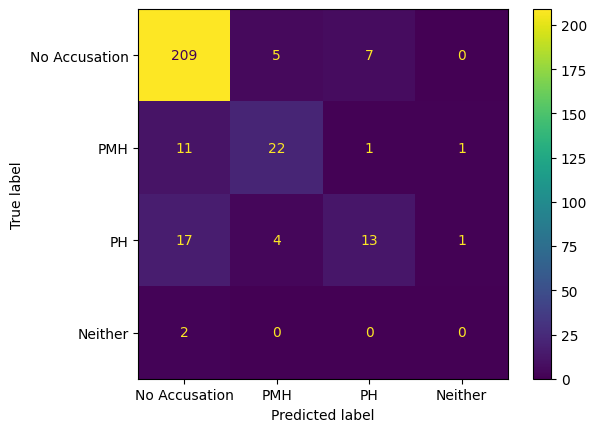

In [95]:
import pandas as pd
results = pd.read_csv('./your_path/few_hypo_llm_outputs.csv')

from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_predictions(results["y"], results["gpt35_y"], display_labels=["No Accusation", "PMH", "PH", "Neither"])
plt.show()

In [96]:
# create a column that says "True" if the Comment column has the regex pattern "hypo"
results["hypo"] = results["comment"].str.contains("hypo*", case=False, na=False)

In [ ]:
# To save error analysis data for each model and error type

model = "gpt4"
predicted = f"{model}_y"
rsn = f"{model}_rsn"


sum = []
for i in range(len(results)):
    if results["y"][i] == 2:
        if results[predicted][i] == 1:
            sum.append(i)
print(len(sum))

r = []
for i in sum:
    mod = model
    comment = results["comment"][i]
    label = results["y"][i]
    hypo_regex = results["hypo"][i]
    predicted_label = results[predicted][i]
    model_reasoning = results[rsn][i]
    r.append([mod, comment, label, hypo_regex, predicted_label, model_reasoning])

data_4 = pd.DataFrame(r, columns=["model", "comment", "label", "hypo_regex", "predicted_label", "model_reasoning"])

In [ ]:
# Get sklearn classification results for each model to visualize the performance of each model

from sklearn.metrics import classification_report

model = "llama"
predicted = f"{model}_y"

print(classification_report(results["y"], results[predicted], target_names=["No Accusation", "PMH", "PH", "Neither"]))

col = ["acc", "prec", "recall", "f1"]
gpt4 = [0.75,0.74,0.72,0.68]
gpt35 = [0.83, 0.55, 0.49, 0.51]
llama = [0.75, 0.72, 0.71, 0.67]

# Create a dataframe with the results
df = pd.DataFrame([gpt4, gpt35, llama], columns=col)

In [ ]:
# Create a bar plot with the results where the x-axis are the metrics and the y-axis are the values and the hue are the models 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
models = ["LLama-3", "GPT-3.5", "GPT-4o"]
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
gpt4_scores = [0.75, 0.74, 0.72, 0.68]
gpt35_scores = [0.83, 0.55, 0.49, 0.51]
llama_scores = [0.75, 0.72, 0.71, 0.67]

# Creating a DataFrame
data = pd.DataFrame({
    'Metrics': metrics * 3,
    'Scores': llama_scores + gpt35_scores + gpt4_scores,
    'Model': ["LLama-3"]*4 + ["GPT-3.5"]*4 + ["GPT-4o"]*4
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metrics', y='Scores', hue='Model', data=data, palette=sns.color_palette("tab10"))
plt.title('Performance Metrics (macro average)', size = 20)
plt.ylim(0, 1)
plt.xlabel("Metrics" , size = 15)
plt.ylabel( "Scores" , size = 15) 
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.legend(fontsize="15", loc ="upper right")
plt.show()

In [ ]:
# Get counts for each label in the dataset

print(results.y.value_counts())
print(results.gpt4_y.value_counts())
print(results.gpt35_y.value_counts())
print(results.llama_y.value_counts())

In [ ]:
# Get barplot of the distribution of the class predictions 

# Data
categories = ['PMH', 'PH', 'Neither', 'No Accusation']
ochac = [35, 35, 2, 221]
gpt_4o = [84, 43, 1, 165]
gpt_35 = [31, 21, 2, 239]
llama = [64, 60, 1, 168]

# Creating a DataFrame
data_dist = pd.DataFrame({
    'Categories': categories * 4,
    'Count': ochac + gpt_4 + gpt_35 + llama,
    'Source': ['CHAC']*4 + ['GPT-4o']*4 + ['GPT-3.5']*4 + ['LLama-3']*4
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Categories', y='Count', hue='Source', data=data_dist, palette=sns.color_palette("tab10"))

# Adding title and labels
plt.title('Distribution of Class Predictions', size = 20)
plt.ylim(0, 250)  # Setting the y limit
plt.xlabel("Class Labels" , size = 15)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.legend(fontsize="15", loc ="upper left")
plt.show()
